In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,binom,t,chi2,chisquare,chi2_contingency
from scipy.stats import ttest_1samp, ttest_ind
import scipy.stats as stats

In [7]:
yulu=pd.read_csv("bike_sharing.csv")

In [8]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
yolo.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
yulu["datetime"]=pd.to_datetime(yulu["datetime"])

In [12]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [27]:
cat1=yulu.holiday.value_counts()
cat1.index

Int64Index([0, 1], dtype='int64')

In [80]:
cat1.head()

372    17
373    16
374     8
375     2
376     3
Name: count, dtype: int64

In [125]:
yulu["day"]=yulu["datetime"].dt.day_name()

In [127]:
yulu["day"].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: day, dtype: int64

In [135]:
def barplot(data=yulu):
    categoical_var=["season","weather","day"]
    for z in categoical_var:
             plt.title(f"Barplot with mean count and {z}")
             sns.barplot(yulu,x=z,y='count',estimator="mean")
             plt.show()
            
            

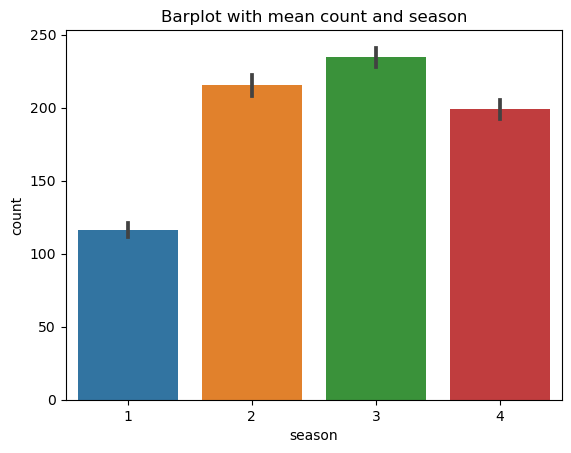

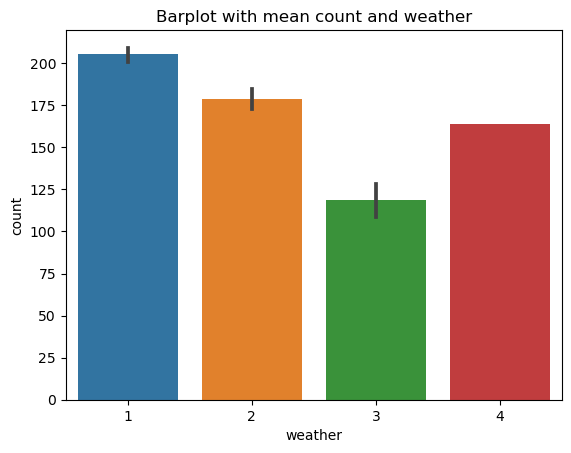

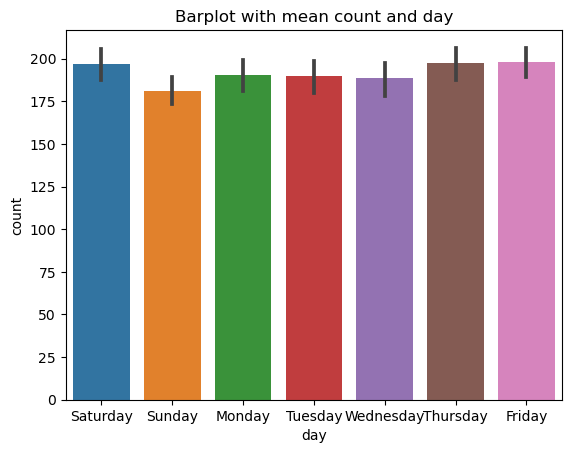

In [136]:
barplot(data=yulu)

# As per the above barplots , the mean usage is higher in season 3, weather 1, and on Mondays.
# Lowest mean counts are on Season 1,Weather 3 and on Sundays

In [162]:
def scat_plot1(data=yulu):
    columns=['temp','atemp', 'humidity', 'windspeed']
    for z in  columns:
            sns.scatterplot(data=yulu,x="count",y=z)
            plt.show()
            

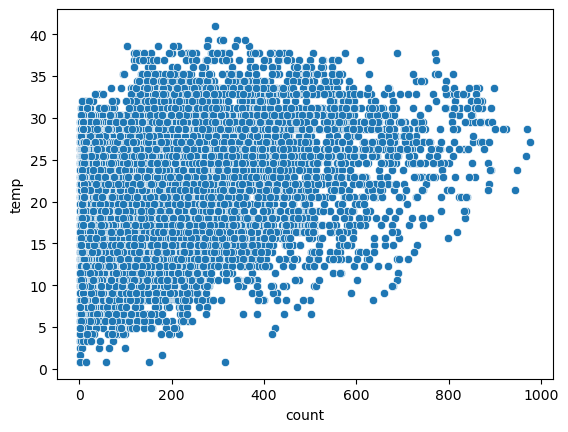

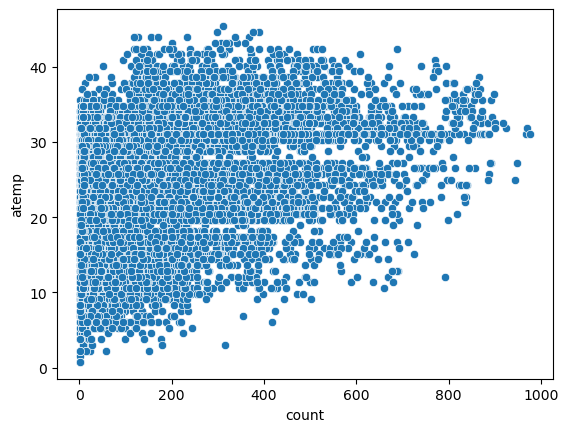

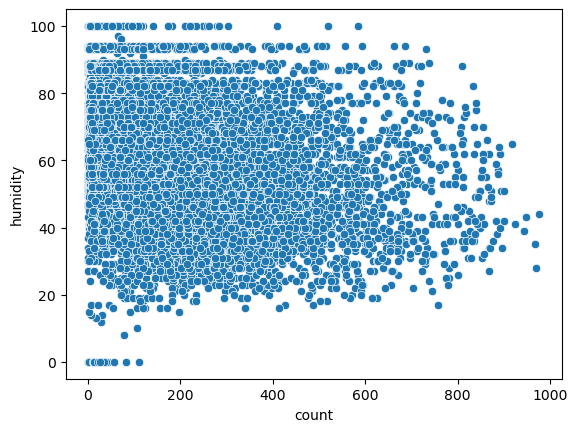

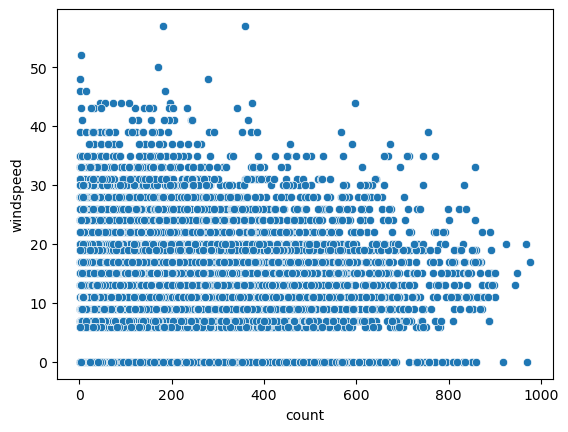

In [165]:
scat_plot1(data=yulu)

In [171]:
yulu[["humidity","temp","atemp","windspeed","count"]].corr()

,humidity,temp,atemp,windspeed,count
humidity,1.000000,-0.064949,-0.043536,-0.318607,-0.317371
temp,-0.064949,1.000000,0.984948,-0.017852,0.394454
atemp,-0.043536,0.984948,1.000000,-0.057473,0.389784
windspeed,-0.318607,-0.017852,-0.057473,1.000000,0.101369
count,-0.317371,0.394454,0.389784,0.101369,1.000000


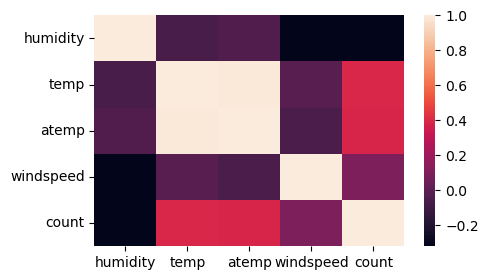

In [177]:
plt.figure(figsize=(5,3))
sns.heatmap(yulu[["humidity","temp","atemp","windspeed","count"]].corr())
plt.show()

# As per the above graphs there is no visible corelation  between humidity and windspee. But there is slight co relation between temp, atemp and count. So we are taking co relation function and found that Humidity and count are negtively co related but temperature is positively co related to count. Windspeed is having only a slight co relation with count.

In [15]:
yulu.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

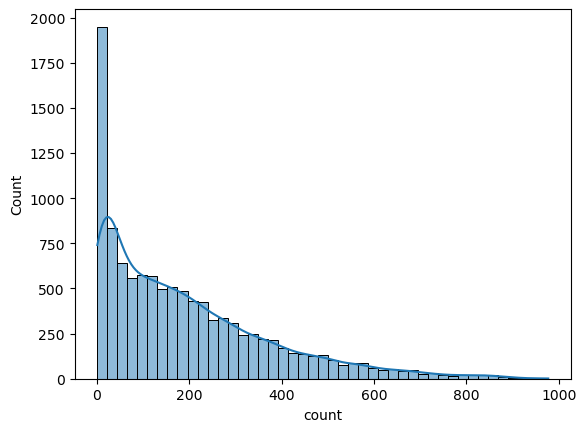

In [89]:
sns.histplot(yulu["count"],kde=True)
plt.show()

In [83]:
from statsmodels.graphics.gofplots import qqplot

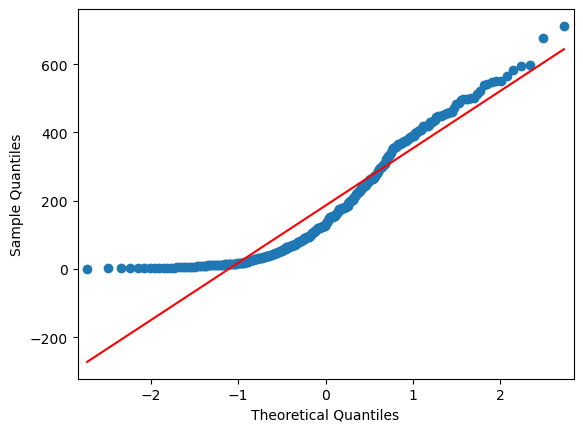

In [84]:
qqplot(cat1,line="s")
plt.show()

# 2- Sample T-Test to check if Working Day & Holiday has an effect on the number of electric cycles rented (10 points)


We had taken the QQ plots to check the normality but the distribution is not following staring line. So we had taken Shapiro test and KS test

Null Hypothesis: Working day has no effect on cycle renting
Alternate hypothesis: Working day is having effect on cycle renting

Null Hypothesis: Holiday has no effect on cycle renting
Alternate hypothesis:Holiday is having effect on cycle renting    
    

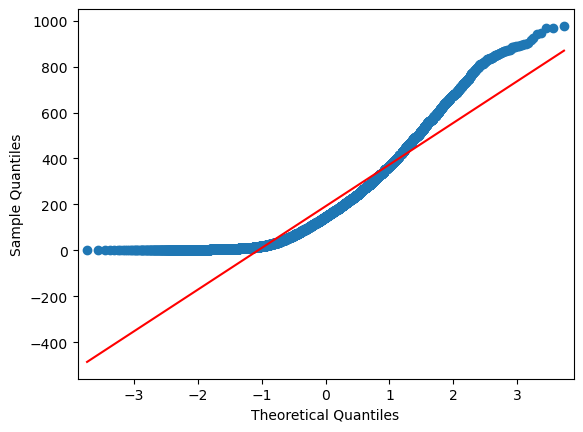

In [207]:
qqplot(cat2,line="s")
plt.show()

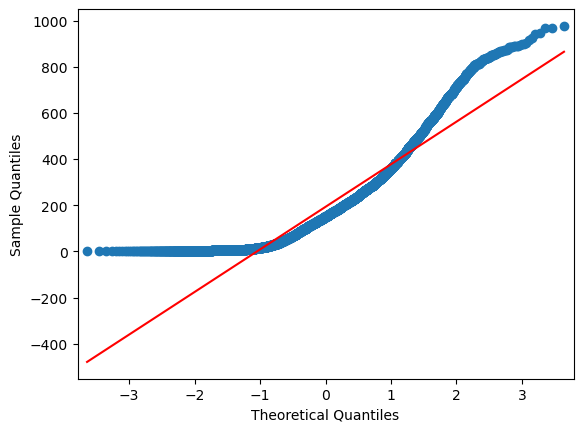

In [208]:
qqplot(cat3,line="s")
plt.show()

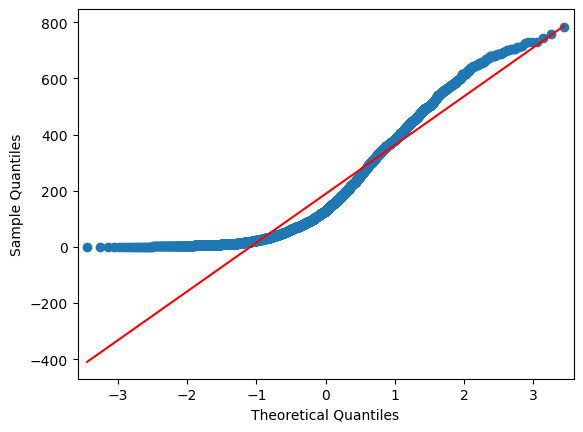

In [209]:
qqplot(cat4,line="s")
plt.show()

<Axes: xlabel='count', ylabel='Count'>

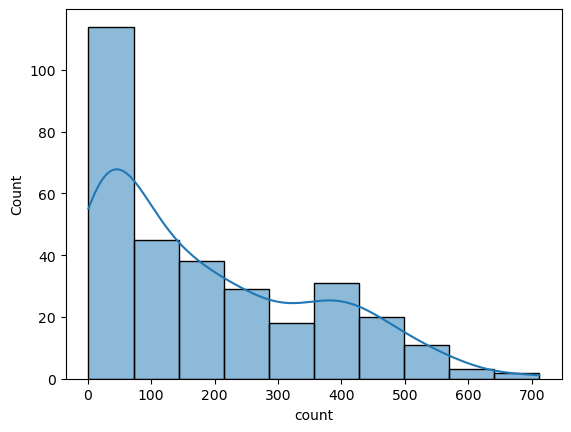

In [86]:
sns.histplot(cat1,kde=True)

In [29]:
cat1=yulu[yulu["holiday"]==1]["count"]
cat2=yulu[yulu["holiday"]==0]["count"]

In [35]:
cat3=yulu[yulu["workingday"]==1]["count"]
cat4=yulu[yulu["workingday"]==0]["count"]

In [200]:
from scipy.stats import shapiro

In [196]:
from scipy.stats import ks_2samp

In [211]:
shapiro(cat1.sample(100))

ShapiroResult(statistic=0.8832045793533325, pvalue=2.4862620762178267e-07)

In [212]:
shapiro(cat2.sample(100))

ShapiroResult(statistic=0.8548923134803772, pvalue=1.80569177388179e-08)

In [213]:
ks_2samp(cat1.sample(100), cat2.sample(100))

KstestResult(statistic=0.11, pvalue=0.5830090612540064, statistic_location=324, statistic_sign=-1)

In [202]:
shapiro(cat3.sample(100))

ShapiroResult(statistic=0.9016486406326294, pvalue=1.6914856360017438e-06)

In [203]:
shapiro(cat4.sample(100))

ShapiroResult(statistic=0.8254368305206299, pvalue=1.6209841247061263e-09)

In [204]:
ks_2samp(cat3.sample(100), cat4.sample(100))

KstestResult(statistic=0.1, pvalue=0.7020569828664881, statistic_location=121, statistic_sign=-1)

In [193]:
def two_t_test(data1,data2):
         for i in range(10):
            a=data1.sample(100)
            b=data2.sample(100)
            print(f" variance sl {i} {np.var(a)} and {np.var(b)}") 
            if(np.var(a)>np.var(b)):
                print(np.var(a)/np.var(b))
            else:
                print(np.var(b)/np.var(a))
            stats,p_val=ttest_ind(a, b, alternative="two-sided", equal_var=True)
            print(f" slno {i} p_val is {p_val}") 
            if(p_val<0.05):
                print(f"p_val is less than alpha, so reject null hypothesis")
            else:
                print(f"p_val is more than alpha, so fail to reject null hypothesis")
          

In [215]:
two_t_test(cat3,cat4)

 variance sl 0 27937.15 and 23913.43159999999
1.1682618566546514
 slno 0 p_val is 0.06006319878476413
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 1 25063.424399999996 and 29502.51559999999
1.1771143132380584
 slno 1 p_val is 0.7749957313624225
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 2 33042.861600000004 and 23899.309899999997
1.3825864319203631
 slno 2 p_val is 0.06042922709951125
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 3 29610.661899999992 and 37671.0616
1.2722127498271159
 slno 3 p_val is 0.7053869457035158
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 4 41518.52750000003 and 33125.3616
1.2533758272996494
 slno 4 p_val is 0.6697069816973845
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 5 36092.29310000001 and 32526.413099999994
1.1096302869005872
 slno 5 p_val is 0.6017989628658917
p_val is more than alpha, so fail to reject null hypothe

In [214]:
two_t_test(cat1,cat2)

 variance sl 0 33770.7731 and 22835.393899999995
1.4788785009747525
 slno 0 p_val is 0.4081728624321258
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 1 23994.17759999999 and 51772.12909999999
2.1576955027623037
 slno 1 p_val is 0.04538583973770492
p_val is less than alpha, so reject null hypothesis
 variance sl 2 25277.082400000003 and 23446.436400000002
1.078077792666181
 slno 2 p_val is 0.7465462517655306
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 3 32720.7504 and 34944.129100000006
1.0679501133934877
 slno 3 p_val is 0.3987319115631065
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 4 30120.817100000007 and 40394.8464
1.3410939771617283
 slno 4 p_val is 0.2277668448376616
p_val is more than alpha, so fail to reject null hypothesis
 variance sl 5 26232.897599999993 and 40327.86190000001
1.5373010833542087
 slno 5 p_val is 0.06436088293302883
p_val is more than alpha, so fail to reject null hypothesis
 v

# As per the QQ plot and shapiro_will test, distributions are not normal. But the KS test result is showing that the distributions are not having significance difference. So we had taken 2 sample T test and majority times the test result as follows
# Working day has no effect on the cycle renting( fail to reject null hypothesis)
# Holiday has no effect on the cycle renting ( fail to reject null hypothesis)

# ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 

In [216]:
yulu["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [217]:
wet1=yulu[yulu["weather"]==1]["count"]
wet2=yulu[yulu["weather"]==2]["count"]
wet3=yulu[yulu["weather"]==3]["count"]
wet4=yulu[yulu["weather"]==4]["count"]

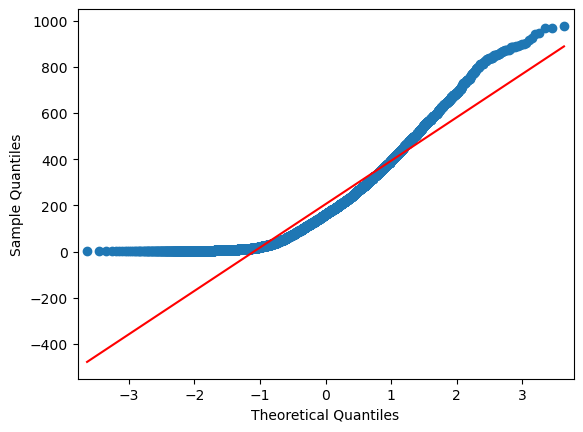

In [219]:
qqplot(wet1,line="s")
plt.show()

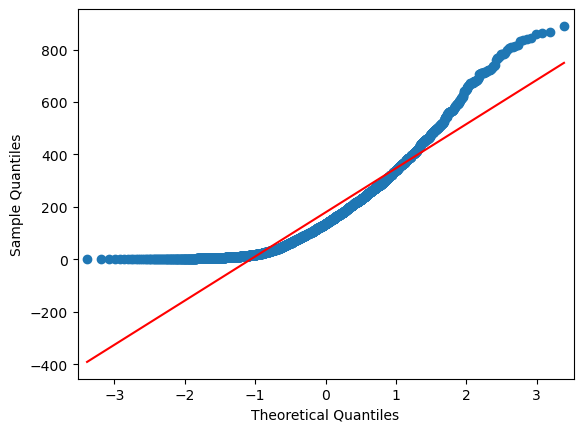

In [220]:
qqplot(wet2,line="s")
plt.show()

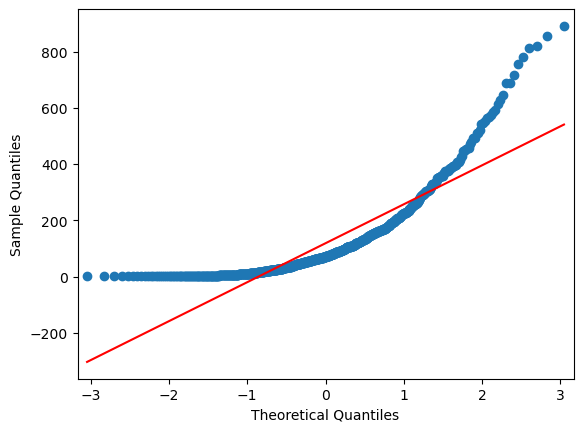

In [221]:
qqplot(wet3,line="s")
plt.show()

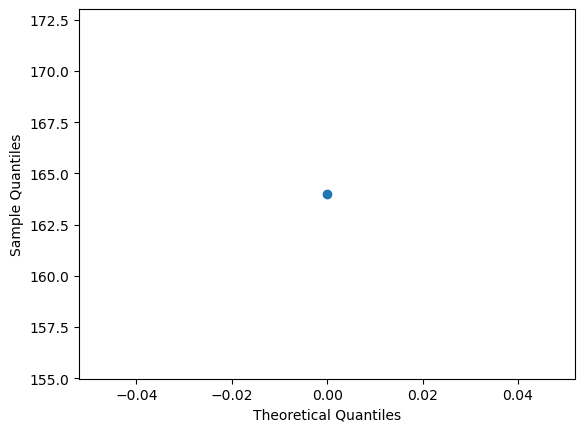

In [222]:
qqplot(wet4,line="s")
plt.show()

In [224]:
shapiro(wet1.sample(100))

ShapiroResult(statistic=0.8824705481529236, pvalue=2.3122764503114013e-07)

In [225]:
shapiro(wet2.sample(100))

ShapiroResult(statistic=0.8802754878997803, pvalue=1.8642842292138084e-07)

In [226]:
shapiro(wet3.sample(100))

ShapiroResult(statistic=0.8149063587188721, pvalue=7.29673654831231e-10)

In [228]:
from scipy import stats

In [229]:
from scipy.stats import levene

In [235]:
stats.kruskal?

In [233]:
from scipy.stats import f_oneway

In [234]:
f_oneway?

In [254]:
levene?

In [258]:
levene(wet1,wet2,wet3)

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

# Null hypothesis : Weather has no effect on cycle renting
# Alternate hypothesis: Weather has effect on cycle renting
# Alpha = 0.05

In [238]:
f_oneway(wet1,wet2,wet3,wet4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

p_value is very much lesser than alpha, so we reject null hypothesis

# Null hypothesis : Season has no effect on cycle renting
# Alternate Hypothesis: Season has effect on cycle renting
# Alpha 0.05

In [239]:
yulu["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [241]:
se1=yulu[yulu["season"]==1]["count"]
se2=yulu[yulu["season"]==2]["count"]
se3=yulu[yulu["season"]==3]["count"]
se4=yulu[yulu["season"]==4]["count"]

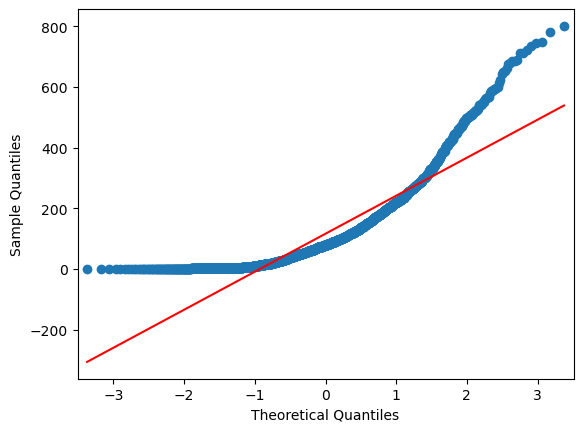

In [242]:
qqplot(se1,line="s")
plt.show()

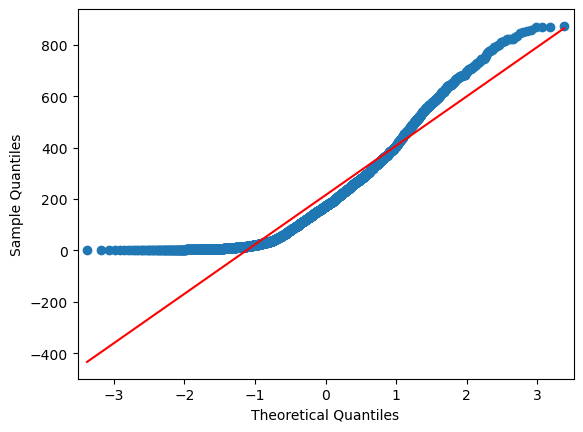

In [243]:
qqplot(se2,line="s")
plt.show()

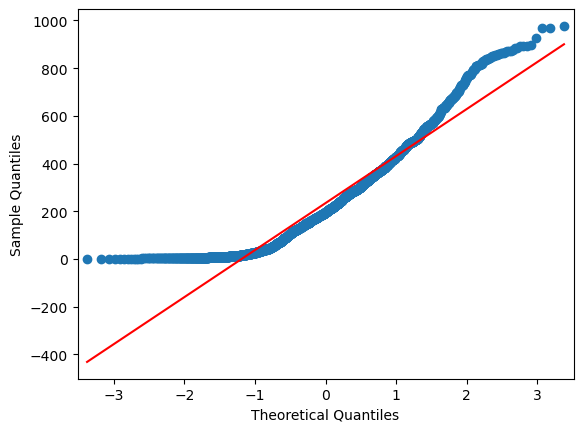

In [244]:
qqplot(se3,line="s")
plt.show()

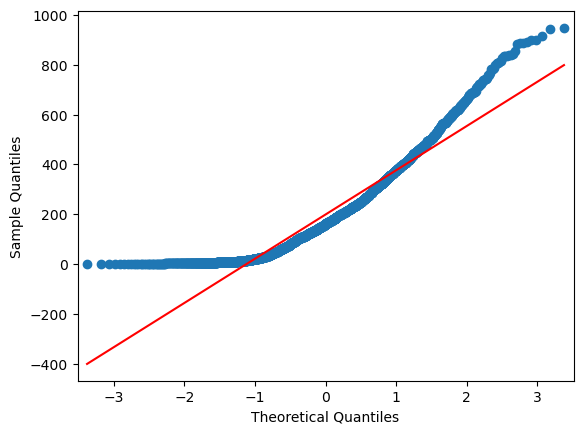

In [245]:
qqplot(se4,line="s")
plt.show()

In [246]:
shapiro(se1.sample(100))

ShapiroResult(statistic=0.7762274742126465, pvalue=4.907596204417608e-11)

In [247]:
shapiro(se2.sample(100))

ShapiroResult(statistic=0.8849061727523804, pvalue=2.9446260896293097e-07)

In [248]:
shapiro(se3.sample(100))

ShapiroResult(statistic=0.9034746289253235, pvalue=2.0672018763434608e-06)

In [249]:
shapiro(se4.sample(100))

ShapiroResult(statistic=0.8681066036224365, pvalue=5.884162845859464e-08)

In [250]:
f_oneway(se1,se2,se3,se4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [252]:
f_oneway(se1.sample(100),se2.sample(100),se3.sample(100),se4.sample(100))

F_onewayResult(statistic=9.866834449466756, pvalue=2.7409941330251788e-06)

In [257]:
levene(se1,se2,se3,se4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

# P_value is very less than alpha , so we reject null hypothesis. So season has effect on the cycle booking

# Chi-square test to check if Weather is dependent on the season (10 points)

In [251]:
pd.crosstab(yulu["weather"],yulu["season"])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [253]:
chi2_contingency(pd.crosstab(yulu["weather"],yulu["season"]))

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

# We have taken alpha as 0.05, the p value is less than alpha . So both the weather and season are depend on each other.


# Inference from the analysis

Working day has no effect on the cycle renting( fail to reject null hypothesis)
Holiday has no effect on the cycle renting ( fail to reject null hypothesis)
Weather has effect on cycle renting
season has effect on the cycle booking
both the weather and season are depend on each other.